# Reading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


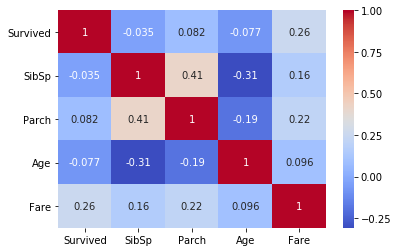

In [4]:
 g = sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, cmap = "coolwarm")

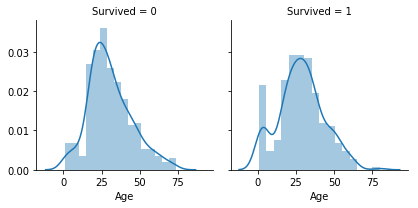

In [5]:
g = sns.FacetGrid(df_train, col='Survived')
g = g.map(sns.distplot, "Age")

In [6]:
df_train[["Sex","Survived"]].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [5]:
# missing training data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# missing test data
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Transform Data

In [7]:
y_train = df_train['Survived']

In [8]:
y = y_train
ratio = sum(y) / len(y)
ratio

0.3838383838383838

In [9]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# df_train = df_train.drop('Name',axis=1)

In [10]:
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# df_test = df_test.drop('Name',axis=1)

In [11]:
df_train.groupby('Title').count().PassengerId

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [12]:
df_train.groupby('Title').Age.mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [13]:
df_test.groupby('Title').Age.mean()

Title
Col       50.000000
Dona      39.000000
Dr        53.000000
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Ms              NaN
Rev       35.500000
Name: Age, dtype: float64

In [14]:
# Set all low number titles to Other
df_train['Title'] = np.where((df_train.Title=='Capt') | (df_train.Title=='Countess') | (df_train.Title=='Don') | (df_train.Title=='Dona')
                        | (df_train.Title=='Jonkheer') | (df_train.Title=='Lady') | (df_train.Title=='Sir') | (df_train.Title=='Major') | (df_train.Title=='Rev') | (df_train.Title=='Col'),'Other',df_train.Title)

In [15]:
df_test['Title'] = np.where((df_test.Title=='Capt') | (df_test.Title=='Countess') | (df_test.Title=='Don') | (df_test.Title=='Dona')
                        | (df_test.Title=='Jonkheer') | (df_test.Title=='Lady') | (df_test.Title=='Sir') | (df_test.Title=='Major') | (df_test.Title=='Rev') | (df_test.Title=='Col'),'Other',df_test.Title)

In [16]:
# New mean ages for each title
df_train.groupby('Title').Age.mean()

Title
Dr        42.000000
Master     4.574167
Miss      21.773973
Mlle      24.000000
Mme       24.000000
Mr        32.368090
Mrs       35.898148
Ms        28.000000
Other     46.875000
Name: Age, dtype: float64

In [17]:
# Set missing age with values

df_train['Age'] = np.where((df_train.Age.isnull()) & (df_train.Title=='Master'),5,
                        np.where((df_train.Age.isnull()) & (df_train.Title=='Miss'),22,
                        np.where((df_train.Age.isnull()) & (df_train.Title=='Mlle'),24,
                        np.where((df_train.Age.isnull()) & (df_train.Title=='Ms'),28, 
                        np.where((df_train.Age.isnull()) & (df_train.Title=='Mme'),24,  
                                 np.where((df_train.Age.isnull()) & (df_train.Title=='Mr'),32,
                                          np.where((df_train.Age.isnull()) & (df_train.Title=='Mrs'),35,
                                                  np.where((df_train.Age.isnull()) & (df_train.Title=='Other'),46,
                                                           np.where((df_train.Age.isnull()) & (df_train.Title=='Dr'),44,df_train.Age)))))))))                   
      

In [18]:
df_test['Age'] = np.where((df_test.Age.isnull()) & (df_test.Title=='Master'),5,
                        np.where((df_test.Age.isnull()) & (df_test.Title=='Miss'),22,
                        np.where((df_test.Age.isnull()) & (df_test.Title=='Mlle'),24,
                        np.where((df_test.Age.isnull()) & (df_test.Title=='Ms'),28, 
                        np.where((df_test.Age.isnull()) & (df_test.Title=='Mme'),24,  
                                 np.where((df_test.Age.isnull()) & (df_test.Title=='Mr'),32,
                                          np.where((df_test.Age.isnull()) & (df_test.Title=='Mrs'),35,
                                                  np.where((df_test.Age.isnull()) & (df_test.Title=='Other'),46,
                                                           np.where((df_test.Age.isnull()) & (df_test.Title=='Dr'),44,df_test.Age)))))))))                   

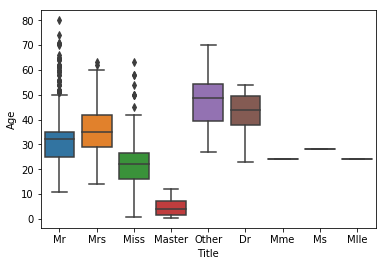

In [19]:
sns.boxplot(data = df_train, x = "Title", y = "Age")

In [20]:
features_to_use = ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked']

In [21]:
df_train2 = df_train[features_to_use]
df_test2 = df_test[features_to_use]

In [22]:
df_test2.isnull().sum()

Sex         0
Age         0
Pclass      0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [23]:
df_train2.head()

,Sex,Age,Pclass,SibSp,Parch,Embarked
0,male,22.0,3,1,0,S
1,female,38.0,1,1,0,C
2,female,26.0,3,0,0,S
3,female,35.0,1,1,0,S
4,male,35.0,3,0,0,S


In [24]:
x_train = pd.get_dummies(data=df_train2, columns=['Sex', 'Embarked'], dummy_na=True)
x_test = pd.get_dummies(data=df_test2, columns=['Sex', 'Embarked'], dummy_na=True)

In [25]:
# x_test.head()
x_test.isnull().sum()

Age             0
Pclass          0
SibSp           0
Parch           0
Sex_female      0
Sex_male        0
Sex_nan         0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
dtype: int64

# Train the Model

In [26]:
import xgboost as xgb

In [27]:
clf = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.02, verbosity=3)
clf.fit(x_train, y_train, eval_metric='error', verbose=True)

[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree prun

[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[21:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=3)

In [43]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.svm import SVC

In [54]:
# copied from https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025,
    'probability' : True
    }

In [61]:
rf_clf = RandomForestClassifier(**rf_params)
ada_clf = AdaBoostClassifier(**ada_params)
gb_clf = GradientBoostingClassifier(**gb_params)
et_clf = ExtraTreesClassifier(**et_params)
svc_clf = SVC(**svc_params, probability=True)

In [62]:
votingC = VotingClassifier(estimators=[('xgb', clf), ('rf', rf_clf), ('ada', ada_clf), ('gb', gb_clf), ('et', et_clf), ('svc', svc_clf) ], voting='soft', n_jobs=4)

votingC = votingC.fit(x_train, y_train)

In [63]:
predictions = votingC.predict(x_test)

In [64]:
submission = pd.DataFrame({ 'PassengerId': df_test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission20190715c.csv', index=False)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [53]:
train_predictions = clf.predict(x_train)

In [55]:
print(recall_score(y_train, train_predictions))

0.6988304093567251


In [56]:
print(precision_score(y_train, train_predictions))

0.8884758364312267


In [57]:
print(accuracy_score(y_train, train_predictions))

0.8507295173961841


In [58]:
print(confusion_matrix(y_train, train_predictions))

[[519  30]
 [103 239]]


In [59]:
print(clf.feature_importances_)

[0.03694912 0.13565712 0.07177009 0.02191234 0.622611   0.
 0.02574132 0.01068216 0.07467687]
